# Task4
## By Het Naik, CE18

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from optparse import OptionParser
import sys
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
             discriminant_analysis, random_projection)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
import pydotplus
!pip install eli5
!pip install pdpbox
from keras.utils.vis_utils import plot_model

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


     |████████████████████████████████| 112kB 2.8MB/s 
     |████████████████████████████████| 57.7MB 69kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=397630cb9049149ba10a5bd4e3d5a134dd69faf5dd43451ecddee338195974da
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


## 1 Linear Model Coefficients
Description:

I have used iris data set for this, and was not sure whether to use linear regression or logistic regression, and that confusion will be solved soon, when I dive deep into it. For starters, I have calculated the coefficients, interceptions (3 due to 3 classes), and the coefficient of determination, which turn out to be very accurate. As I faced some problem for the number of iterations, I will look into it and update it soon!

Coefficients :  [[-0.41737313  0.85016605 -2.3319801  -0.98816484]
 [ 0.52060473 -0.29764707 -0.22056414 -0.71100951]
 [-0.1032316  -0.55251898  2.55254424  1.69917435]]
Interception :  [  9.25390342   1.7598178  -11.01372122]
Coefficient of determination: 0.98


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


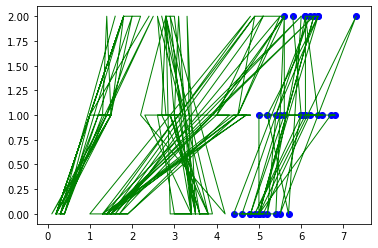

In [ ]:
iris= datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lmc=LogisticRegression()
lmc.fit(X_train,y_train)
y_preds = lmc.predict(X_test)
print("Coefficients : ", lmc.coef_)
print("Interception : ", lmc.intercept_)
print('Coefficient of determination:', lmc.score(X, y))
plt.scatter(X_test[:,0], y_test,  color='blue')
plt.plot(X_test, y_preds, color='green', linewidth=1)
plt.show()

## 2 Decision Tree
Description:

Continuing from the above example, I have made a Decision Tree for irisdataset

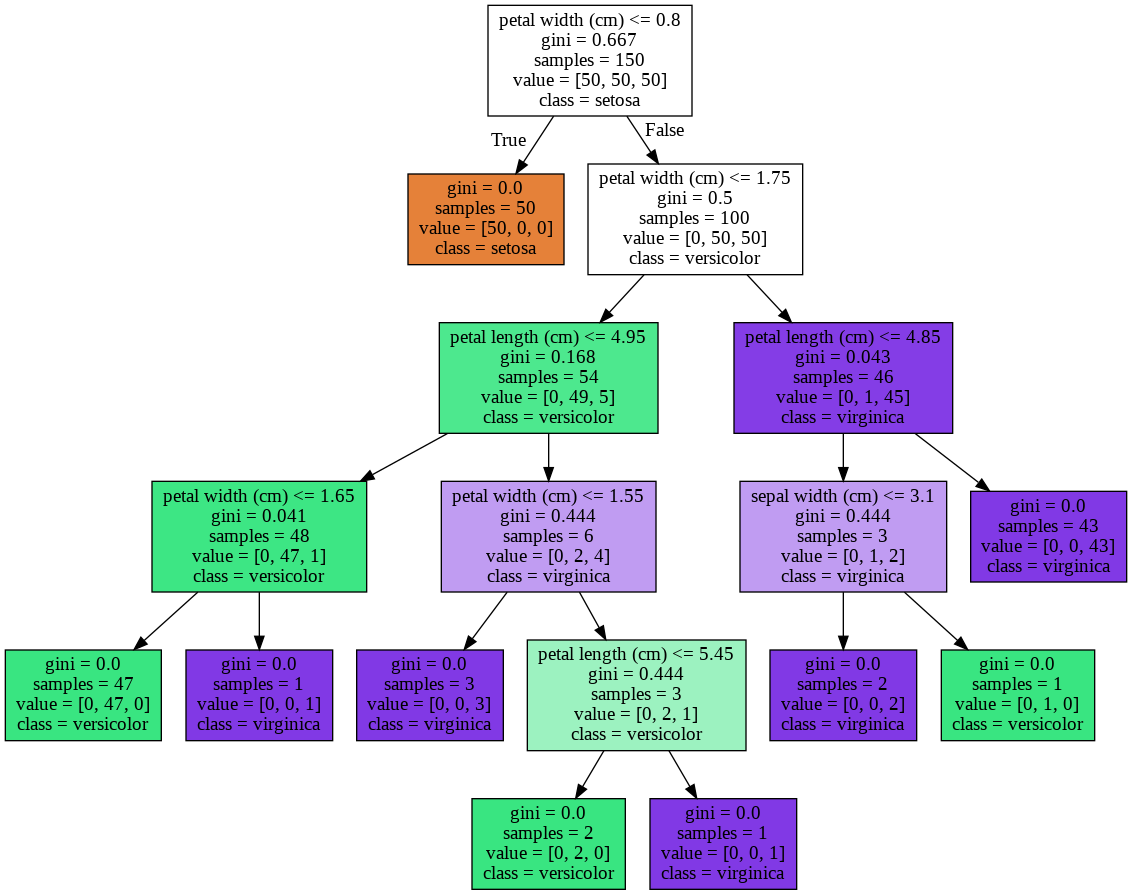

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
model = clf.fit(X, y)
#print(X)
dot_data = tree.export_graphviz(clf, out_file=None, 
                                filled=True,                            # To give color to our tree
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data)  # Making graph
Image(graph.create_png()) 

## 3 eXplainable Neural Networks
Description:

I used relu for actinvation initially, which I had learned from the ML course by Andrew Ng sir, and this time it worked out pretty well, as my accuracy is 97% for 150 epochs, and 100% for around 200 epochs, for 50 epochs, my accuracy was around 84%! 

I divided then number of equal test-predicted values with the total predicted values and it turned out to be 1!

Epoch 1/50
112/112 [==============================] - 0s 2ms/step - loss: -0.2016
Epoch 2/50
112/112 [==============================] - 0s 989us/step - loss: -1.1975
Epoch 3/50
112/112 [==============================] - 0s 1ms/step - loss: -2.1458
Epoch 4/50
112/112 [==============================] - 0s 1ms/step - loss: -3.3471
Epoch 5/50
112/112 [==============================] - 0s 1ms/step - loss: -4.8696
Epoch 6/50
112/112 [==============================] - 0s 1ms/step - loss: -6.8295
Epoch 7/50
112/112 [==============================] - 0s 971us/step - loss: -9.4149
Epoch 8/50
112/112 [==============================] - 0s 1ms/step - loss: -12.4243
Epoch 9/50
112/112 [==============================] - 0s 975us/step - loss: -16.3840
Epoch 10/50
112/112 [==============================] - 0s 975us/step - loss: -21.1902
Epoch 11/50
112/112 [==============================] - 0s 997us/step - loss: -27.0814
Epoch 12/50
112/112 [==============================] - 0s 988us/step - loss: -34.2

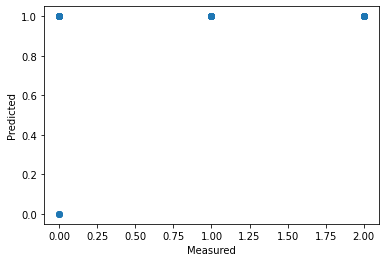

[[1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


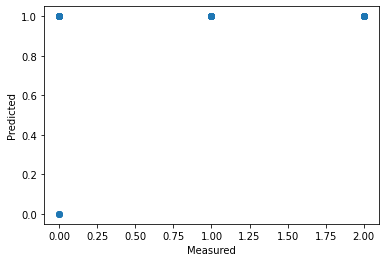

IndexError: ignored

In [ ]:
classifier = Sequential()
classifier.add(Dense(units = 16, activation = 'relu', input_dim = 4))
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
classifier.fit(X_train, y_train, batch_size = 1, epochs = 50)
y_preds = classifier.predict(X_test)
print(y_preds)
fig, ax = plt.subplots()
ax.scatter(y_test, y_preds)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


print(y_preds)


fig, ax = plt.subplots()
ax.scatter(y_test, y_preds)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

accp = 0
for i in y_preds:
  if(y_test[i] == y_preds[i]):
    accp+=1
    
print('Accuracy is ', (accp/len(y_preds))*100, 'percent')

print(classifier.summary())

plot_model(classifier, show_shapes=True, show_layer_names=True)

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving xNN2.png to xNN2.png


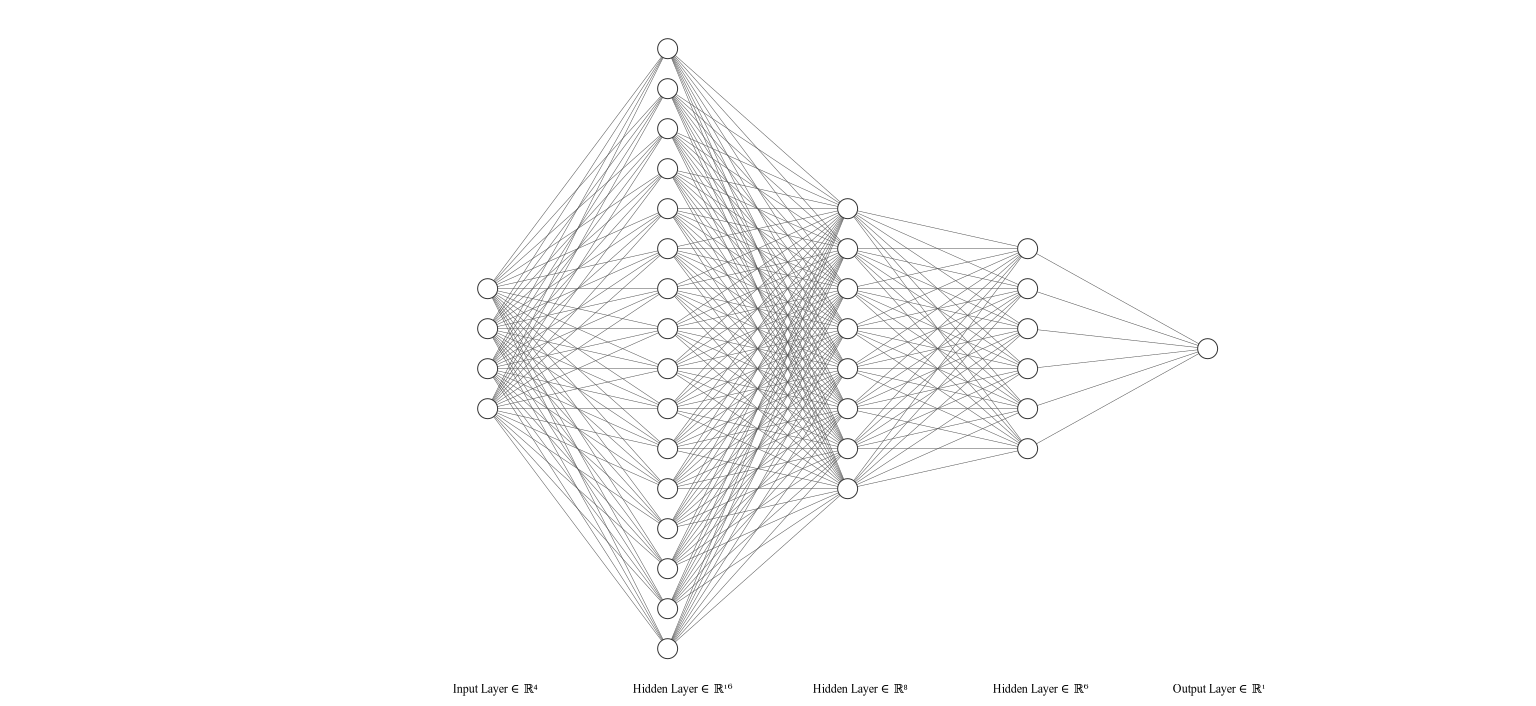

In [ ]:
Image("xNN2.png")

## 4 tSNE using Image dataset
Description:

I have used digits dataset, as used in Task2, and performed almost similar approach for embedding the digits.

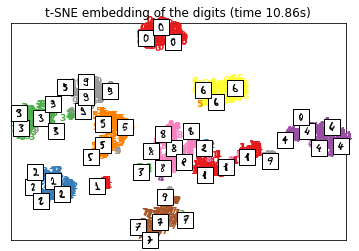

In [ ]:
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)     
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

## 5 tSNE using Text dataset
Description:

I have used the iris dataset and thereby fitted and tranformed the data for visualization of the three different types of iris species, which is indicated by the 3 colours, the Sentosa Iris seems different in terms of its data from the other two. The learning rate is 150 which is in the general-optimal range

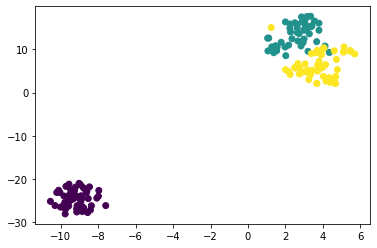

In [ ]:
iris = load_iris()

tsne_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
#print(tsne_df)
tsne = TSNE(learning_rate=150)
tsne_df = tsne.fit_transform(tsne2_df)
x = tsne_df[:,0]
y = tsne_df[:,1]
plt.figure()
plt.scatter(x, y, c=iris['target'])
plt.show()

## 6 Unsupervised Learning Metrices
Description:

Different clusters of 4 different categories have been made. Thses categories include atheism, religion, graphics and space. The max words occured in the 4 clusters are also shown.

I have Used a scipy.sparse matrix to store the features instead of standard numpy arrays. TfidfVectorizer maps the most frequent words to features indices and computes a word occurrence frequency matrix which are then reweighted using the IDF vector. HashingVectorizer hashes word occurrences. The word count vectors are then normalized to each have l2-norm equal to 1. Hence, the documents are clustered by topics using a bag-of-words approach.
Although frankly I have not understood the entire working of this code, but will do very very soon! :)

In [ ]:
def is_interactive():
    return not hasattr(sys.modules['__main__'], '__file__')

argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)

categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

print("categories",categories)

mydata = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(mydata.data))
print("%d categories" % len(mydata.target_names))
print()

labels = mydata.target
kIsTrue = np.unique(labels).shape[0]

initialTime = time()
if opts.use_hashing:
    if opts.use_idf:
        # IDF normalization on the output of HashingVectorizer
        hasher = HashingVectorizer(n_features=opts.n_features,
                                   stop_words='english', alternate_sign=False,
                                   norm=None)
        vectorizee = make_pipeline(hasher, TfidfTransformer())
    else:
        vectorizee = HashingVectorizer(n_features=opts.n_features,
                                       stop_words='english',
                                       alternate_sign=False, norm='l2')
else:
    vectorizee = TfidfVectorizer(max_df=0.5, max_features=opts.n_features,
                                 min_df=2, stop_words='english',
                                 use_idf=opts.use_idf)
X = vectorizee.fit_transform(mydata.data)

print("number of samples: %d, number of features: %d" % X.shape)
print()

if opts.n_components:
    initialTime = time()
    svd = TruncatedSVD(opts.n_components)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)
    X = lsa.fit_transform(X)
    explained_variance = svd.explained_variance_ratio_.sum()
    print()

if opts.minibatch:
    km = MiniBatchKMeans(n_clusters=kIsTrue, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000, verbose=opts.verbose)
else:
    km = KMeans(n_clusters=kIsTrue, init='k-means++', max_iter=100, n_init=1,
                verbose=opts.verbose)

initialTime = time()
km.fit(X)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))
print()

if not opts.use_hashing:
    print("Major terms in the clusters:")
    if opts.n_components:
        osc = svd.inverse_transform(km.cluster_centers_)
        centroid_order = osc.argsort()[:, ::-1]
    else:
        centroid_order = km.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizee.get_feature_names()
    for i in range(kIsTrue):
        print("Cluster %d:" % (i+1), end='')
        for ind in centroid_order[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

categories ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3387 documents
4 categories

number of samples: 3387, number of features: 10000

Homogeneity: 0.283
Completeness: 0.388
V-measure: 0.327
Silhouette Coefficient: 0.005

Major terms in the clusters:
Cluster 1: god sandvik com jesus kent koresh people apple cs article
Cluster 2: com graphics university posting host nntp article don like know
Cluster 3: space henry nasa toronto alaska gov zoo launch spencer aurora
Cluster 4: access digex pat prb hst net express online communications com
